In [126]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [127]:
steel_plates_fauly = arff.loadarff('php9xWOpn.arff')
ionosphere = arff.loadarff('dataset_59_ionosphere.arff')
banknote = arff.loadarff('php50jXam.arff')

spf = pd.DataFrame(steel_plates_fauly[0])
ion = pd.DataFrame(ionosphere[0])
bank = pd.DataFrame(banknote[0])

spf_data = spf.to_numpy()
ion_data = ion.to_numpy()
bank_data = bank.to_numpy()

X1 = spf_data[:, :-1]
y1 = spf_data[:, -1]

X2 = ion_data[:, :-1]
y2 = ion_data[:, -1]

X3 = bank_data[:, :-1]
y3 = bank_data[:, -1]

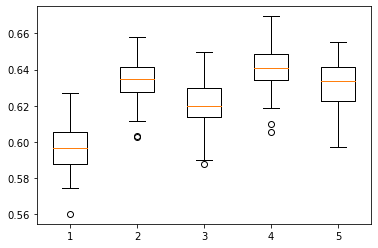

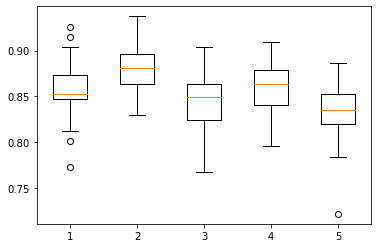

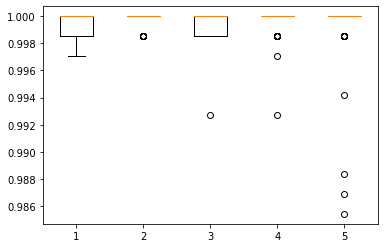

In [130]:
neighbor_values  = [1,2,3,4,5]
spf_accuracy_list = []
ion_accuracy_list = []
bank_accuracy_list = []

for n in neighbor_values:
    for r in range(50):

        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.5, random_state=r)
        y_train = y_train.astype('str')
        y_test = y_test.astype('str')

        neigh = KNeighborsClassifier(n_neighbors=n)   

        neigh.fit(X_train, y_train)
        pre_y = neigh.predict(X_test)

        spf_accuracy = accuracy_score(y_test, pre_y)
        spf_accuracy_list.append(spf_accuracy)

for n in neighbor_values:
    for r in range(50):

        X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5, random_state=r)
        y_train = y_train.astype('str')
        y_test = y_test.astype('str')

        neigh = KNeighborsClassifier(n_neighbors=n)   

        neigh.fit(X_train, y_train)
        pre_y = neigh.predict(X_test)

        ion_accuracy = accuracy_score(y_test, pre_y)
        ion_accuracy_list.append(ion_accuracy)


for n in neighbor_values:
    for r in range(50):

        X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.5, random_state=r)
        y_train = y_train.astype('str')
        y_test = y_test.astype('str')

        neigh = KNeighborsClassifier(n_neighbors=n)   

        neigh.fit(X_train, y_train)
        pre_y = neigh.predict(X_test)

        bank_accuracy = accuracy_score(y_test, pre_y)
        bank_accuracy_list.append(bank_accuracy)

spfDF = pd.DataFrame( {'1':spf_accuracy_list[0:50], '2':spf_accuracy_list[50:100], '3':spf_accuracy_list[100:150], '4':spf_accuracy_list[150:200], '5':spf_accuracy_list[200:250] } )
ionDF = pd.DataFrame( {'1':ion_accuracy_list[0:50], '2':ion_accuracy_list[50:100], '3':ion_accuracy_list[100:150], '4':ion_accuracy_list[150:200], '5':ion_accuracy_list[200:250] } )
bankDf = pd.DataFrame( {'1':bank_accuracy_list[0:50], '2':bank_accuracy_list[50:100], '3':bank_accuracy_list[100:150], '4':bank_accuracy_list[150:200], '5':bank_accuracy_list[200:250] } )

plt.boxplot(spfDF)
plt.show()
plt.boxplot(ionDF)
plt.show()
plt.boxplot(bankDf)
plt.show()